In [7]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import math

In [6]:
# read in 3 example audio files
files = ['full_songs/rock1.wav', 'full_songs/folk1.wav', librosa.example('nutcracker')]
y = []
sr = []
print(files)
for i in range(3):
    print(files[i])
    y.append([])
    sr.append([])
    y[i], sr[i] = librosa.load(files[i])
    print('y = ', y[i], y[i].shape)
    print('sr = ', sr[i])

['full_songs/rock1.wav', 'full_songs/folk1.wav', 'C:\\Users\\dirto\\AppData\\Local\\librosa\\librosa\\Cache\\Kevin_MacLeod_-_P_I_Tchaikovsky_Dance_of_the_Sugar_Plum_Fairy.ogg']
full_songs/rock1.wav
y =  [ 2.79414962e-07 -2.14049578e-07  5.59779255e-06 ... -3.51738345e-06
 -1.11379585e-07  6.82292102e-06] (4622400,)
sr =  22050
full_songs/folk1.wav
y =  [ 5.7128932e-07 -1.0011192e-06  2.0691309e-06 ...  8.0156788e-06
 -1.0126948e-05  6.2398976e-06] (2260480,)
sr =  22050
C:\Users\dirto\AppData\Local\librosa\librosa\Cache\Kevin_MacLeod_-_P_I_Tchaikovsky_Dance_of_the_Sugar_Plum_Fairy.ogg
y =  [ 2.2716868e-06  5.3327185e-06 -7.2473276e-06 ...  1.1170751e-05
  1.2871917e-06  5.4120615e-06] (2643264,)
sr =  22050


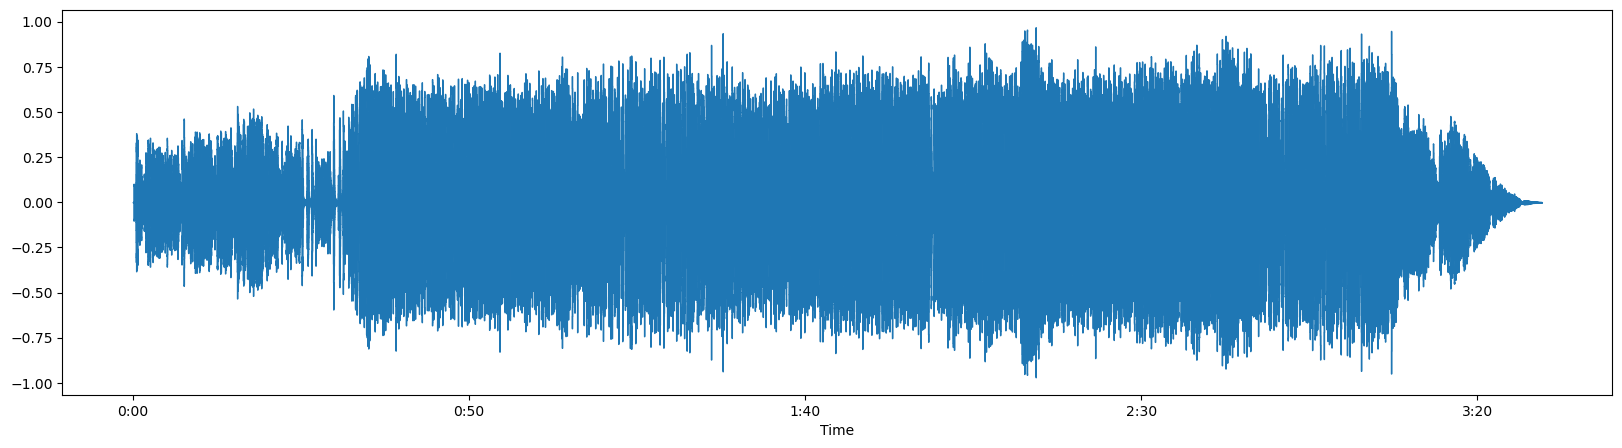

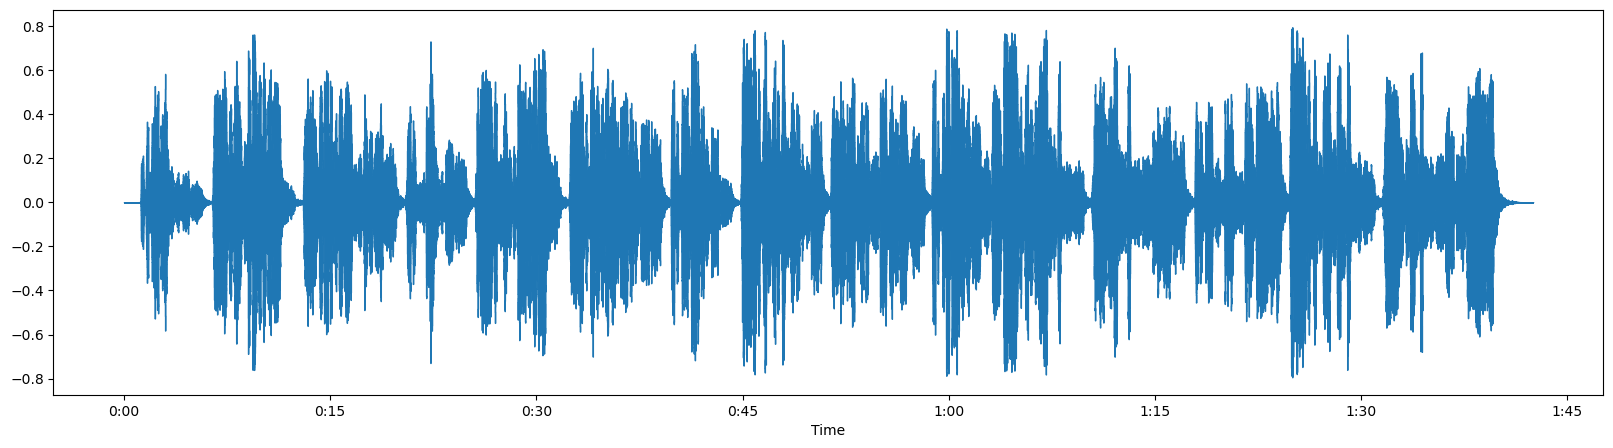

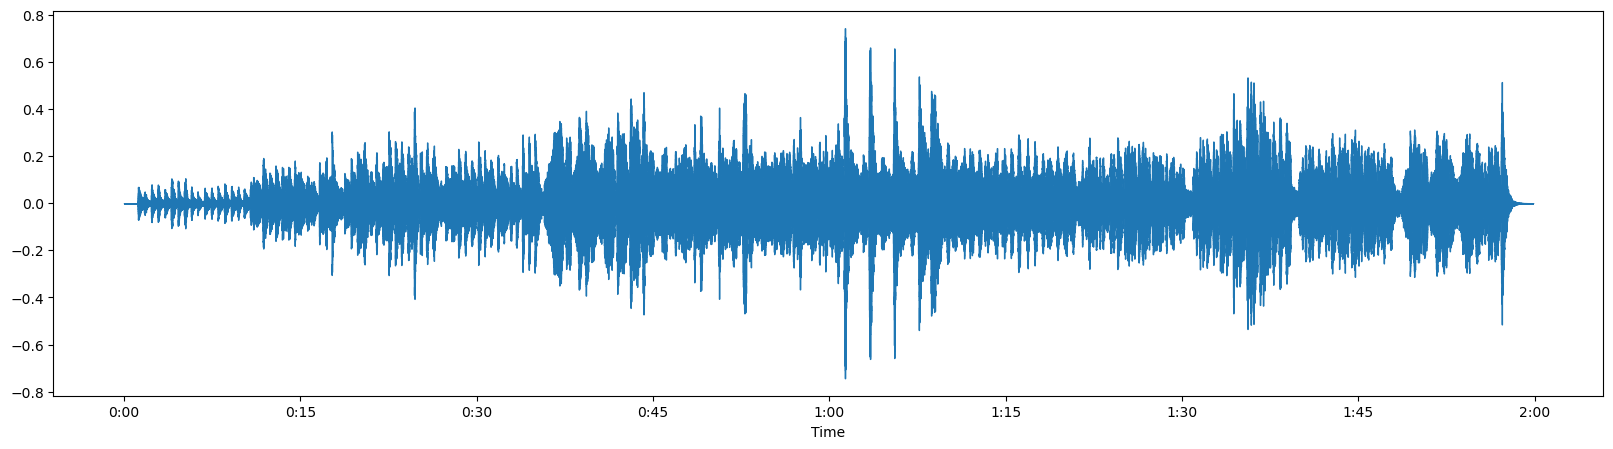

In [56]:
# waveplots
for i in range(3):
    plt.figure(figsize=(20, 5))
    librosa.display.waveshow(y[i], sr=sr[i])
    plt.show()

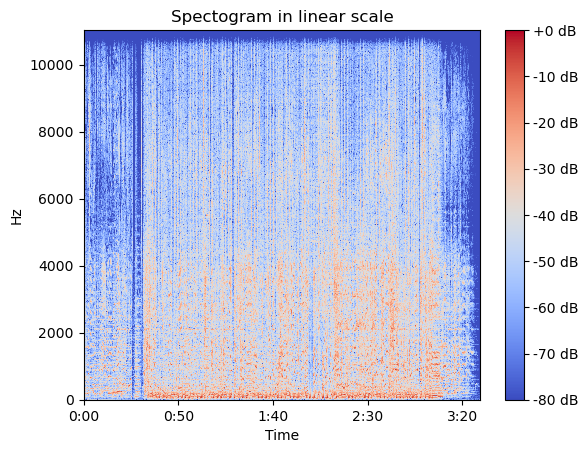

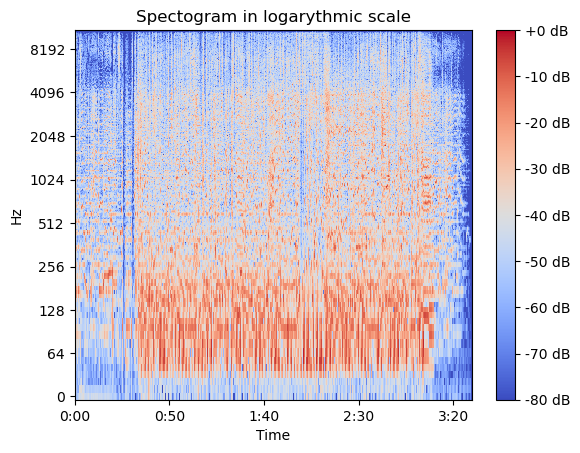

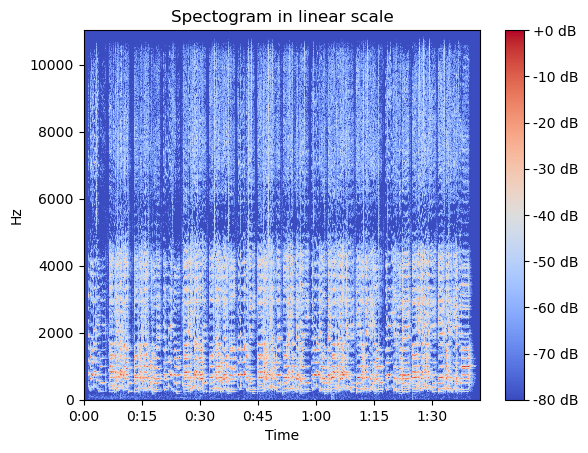

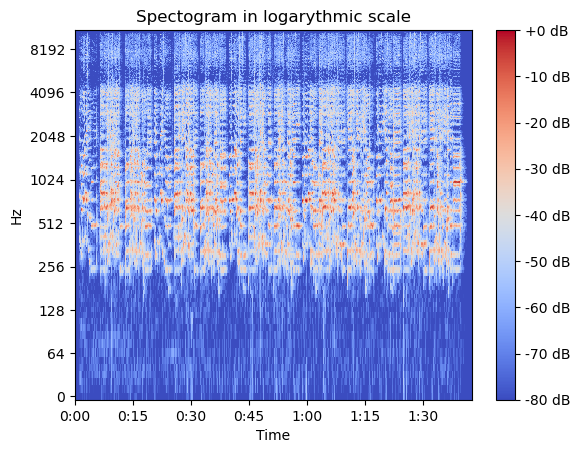

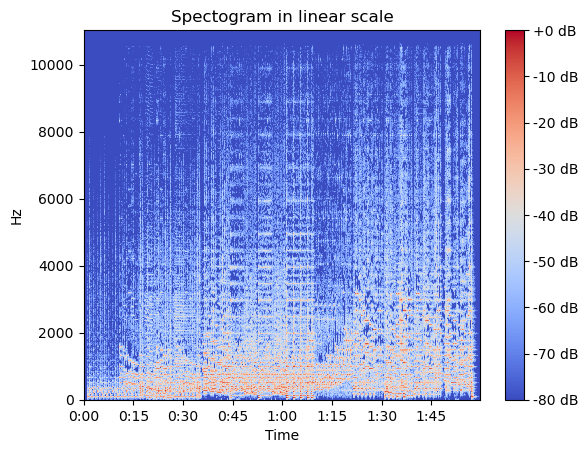

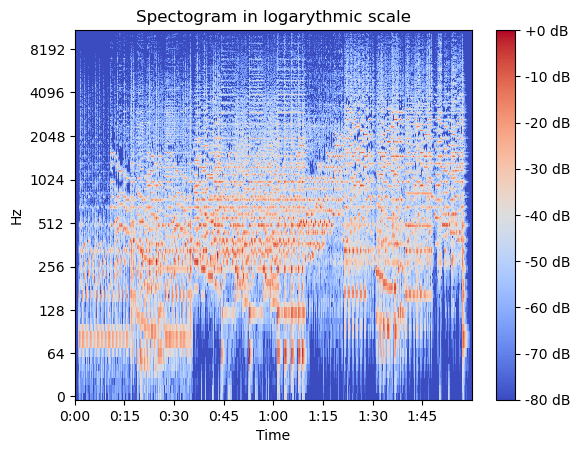

In [37]:
# spectrograms in linear and logarythmic scales
for i in range(3):    
    stft = librosa.stft(y[i])  # STFT = short-time Fourier transform
    stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

    fig, ax = plt.subplots()
    img = librosa.display.specshow(stft_db, x_axis='time', y_axis='linear', ax=ax, cmap='coolwarm')
    ax.set(title='Spectrogram in linear scale')
    fig.colorbar(img, ax=ax, format="%+2.f dB")

    fig, ax = plt.subplots()
    img = librosa.display.specshow(stft_db, x_axis='time', y_axis='log', ax=ax, cmap='coolwarm')
    ax.set(title='Spectrogram in logarythmic scale')
    fig.colorbar(img, ax=ax, format="%+2.f dB")

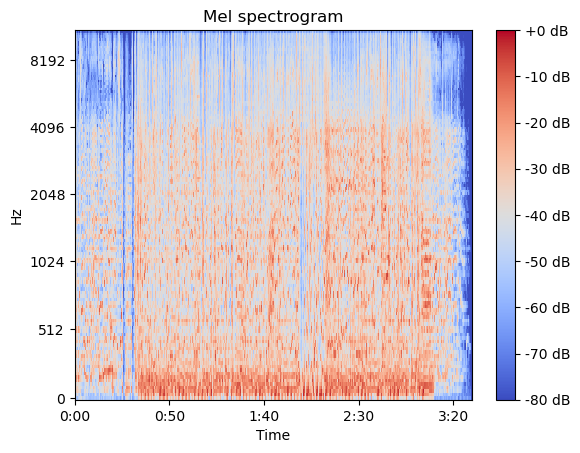

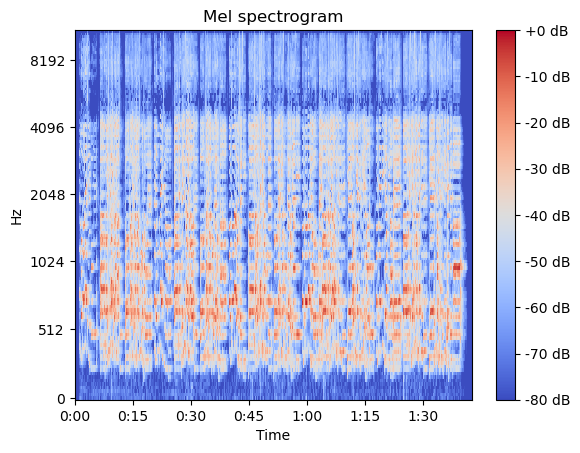

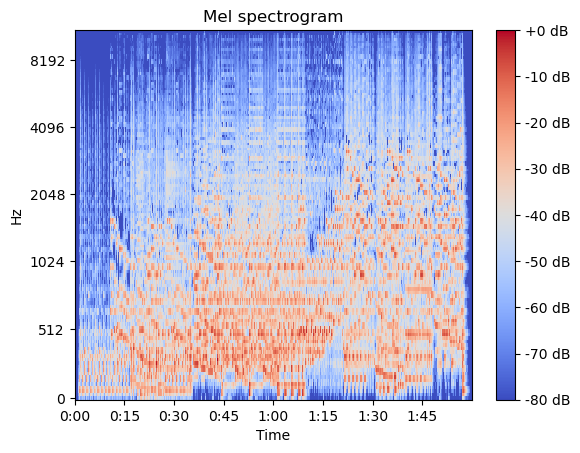

In [36]:
# mel spectrogram
for i in range(3):
    fig, ax = plt.subplots()
    mel = librosa.feature.melspectrogram(y=y[i], sr=sr[i])
    mel_db = librosa.power_to_db(mel, ref=np.max)
    img = librosa.display.specshow(mel_db, y_axis='mel', x_axis='time', ax=ax, cmap='coolwarm')
    ax.set(title='Mel spectrogram')
    fig.colorbar(img, ax=ax, format="%+2.f dB")

Chorma =  [[0.54757375 0.53294325 0.53676397 ... 0.29578814 0.48127756 0.8283353 ]
 [0.48285833 0.7117425  0.6061237  ... 0.32762125 0.891427   1.        ]
 [0.52306175 0.77459854 0.89408976 ... 0.42288443 1.         0.9339566 ]
 ...
 [0.93461424 0.9119613  1.         ... 0.41934916 0.5915958  0.3573034 ]
 [0.6696505  0.53073066 0.5202564  ... 0.28463143 0.54924107 0.57818604]
 [0.5521755  0.39158282 0.4552168  ... 0.21308252 0.42561415 0.70808744]] (12, 9029)
Mean =  [0.4205667  0.3506069  0.41241667 0.3578012  0.41098788 0.464096
 0.4000676  0.4489437  0.3883446  0.4670257  0.3992063  0.34788162]
Std =  [0.31093922 0.26415095 0.31446484 0.27172774 0.2888663  0.31728616
 0.27006385 0.31805444 0.26969066 0.3171356  0.28648198 0.25887007]


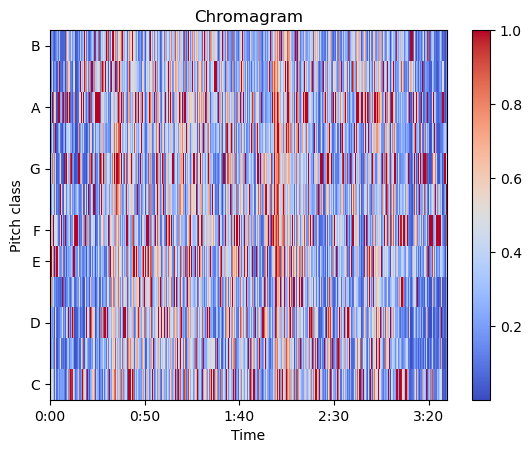

Chorma =  [[0.96436787 0.8170533  0.6934318  ... 0.7884078  0.70607704 0.6460347 ]
 [0.9584591  1.         0.9253427  ... 1.         0.8326063  0.77555966]
 [0.81150806 0.8346651  1.         ... 0.94281316 0.9570789  0.8391258 ]
 ...
 [0.45071036 0.41562936 0.4244831  ... 0.47028917 0.45357573 0.3758178 ]
 [0.6105978  0.56755954 0.60952294 ... 0.5546852  0.474662   0.37728876]
 [0.8170725  0.73372656 0.650053   ... 0.6529331  0.61127466 0.6322785 ]] (12, 4416)
Mean =  [0.15961689 0.15003923 0.14637858 0.3407163  0.3714123  0.22414266
 0.39693928 0.20152971 0.26035616 0.10023503 0.17005216 0.34680253]
Std =  [0.18418288 0.24016115 0.20436989 0.3344653  0.3763135  0.19532804
 0.4101996  0.19288109 0.36045668 0.14808011 0.19989339 0.36927906]


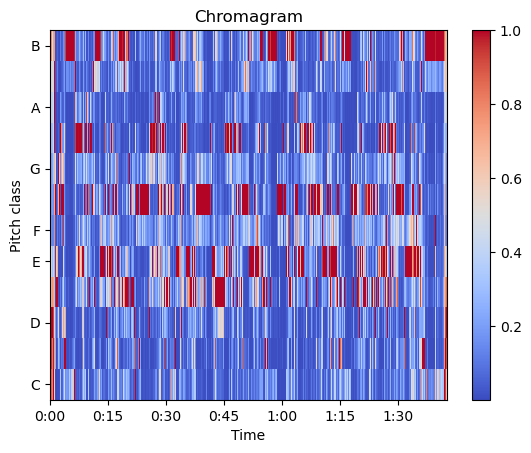

Chorma =  [[1.         0.95686096 0.73361415 ... 0.13945055 0.14316301 0.26656413]
 [0.6889905  0.75139886 0.59919995 ... 0.12660554 0.10302571 0.16190486]
 [0.92364764 1.         1.         ... 0.25967485 0.17342271 0.29054517]
 ...
 [0.66082907 0.8060107  0.6542876  ... 0.06554421 0.09700032 0.21168177]
 [0.48511913 0.6086193  0.83328676 ... 0.21253026 0.17956953 0.33065113]
 [0.6745773  0.6955445  0.9613534  ... 0.66404456 0.5531777  1.        ]] (12, 5163)
Mean =  [0.25442904 0.22944878 0.22174904 0.2631474  0.33100727 0.19945617
 0.36338615 0.30038616 0.14626534 0.194791   0.25794783 0.39936376]
Std =  [0.26635256 0.28541195 0.27000555 0.26728836 0.3396073  0.20145546
 0.33738658 0.32781473 0.15767272 0.26419914 0.27667838 0.36674017]


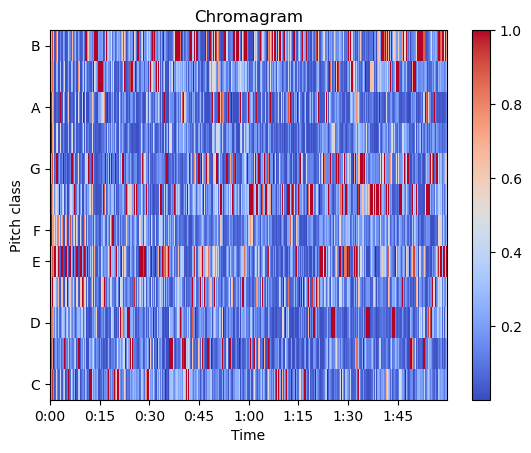

In [70]:
# chromagram
for i in range(3):
    chroma = librosa.feature.chroma_stft(y=y[i], sr=sr[i])
    print('Chorma = ', chroma, chroma.shape)
    print('Mean = ', chroma.mean(axis=1))
    print('Std = ', chroma.std(axis=1))
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax, cmap='coolwarm')
    ax.set(title='Chromagram')
    fig.colorbar(img, ax=ax)
    plt.show()

In [60]:
# zero-crossing rate without added 0.01
for i in range(3):
    zcr = librosa.feature.zero_crossing_rate(y[i])
    print('Zero-crossing rate = ', zcr, zcr.shape)
    print('Mean = ', zcr.mean())
    print('Std = ', zcr.std())

Zero-crossing rate =  [[0.25732422 0.29150391 0.32617188 ... 0.48632812 0.46484375 0.39599609]] (1, 9029)
Mean =  0.15246764548607267
Std =  0.07161263525006548
Zero-crossing rate =  [[0.37451172 0.55273438 0.73583984 ... 0.74267578 0.55078125 0.37109375]] (1, 4416)
Mean =  0.13146276059358017
Std =  0.0902061884599654
Zero-crossing rate =  [[0.28417969 0.42529297 0.55957031 ... 0.33642578 0.29736328 0.22070312]] (1, 5163)
Mean =  0.08719607967751307
Std =  0.0620940219754261


In [57]:
# zero-crossing rate with added 0.01
for i in range(3):
    zcr = librosa.feature.zero_crossing_rate(y[i] + 0.01)
    print('Zero-crossing rate = ', zcr, zcr.shape)
    print('Mean = ', zcr.mean())
    print('Std = ', zcr.std())

Zero-crossing rate =  [[0. 0. 0. ... 0. 0. 0.]] (1, 9029)
Mean =  0.1479295339150238
Std =  0.0730308274501915
Zero-crossing rate =  [[0. 0. 0. ... 0. 0. 0.]] (1, 4416)
Mean =  0.11173911716627039
Std =  0.05201456724910437
Zero-crossing rate =  [[0. 0. 0. ... 0. 0. 0.]] (1, 5163)
Mean =  0.0778095039221383
Std =  0.04574122433325336


In [59]:
# spectral centroid without added 0.01
for i in range(3):
    centroid = librosa.feature.spectral_centroid(y=y[i], sr=sr[i])
    print('Spectral centroid = ', centroid, centroid.shape)
    print('Mean = ', centroid.mean())
    print('Std = ', centroid.std())

Spectral centroid =  [[4869.43086497 3549.99617047 3148.15965248 ... 3217.95284959
  4728.77836375 7433.18265835]] (1, 9029)
Mean =  2823.62028021018
Std =  800.053922578128
Spectral centroid =  [[7447.75419769 7485.94006927 7462.70990001 ... 7585.00509467
  7565.29434478 7504.06605762]] (1, 4416)
Mean =  2526.1399242440216
Std =  889.8606374440719
Spectral centroid =  [[6022.8335013  5909.7081502  5783.15389511 ... 4825.8989104
  5014.75896051 5007.97385782]] (1, 5163)
Mean =  1450.4101585407159
Std =  652.927523144119


In [58]:
# spectral centroid with added 0.01
for i in range(3):
    centroid = librosa.feature.spectral_centroid(y=y[i] + 0.01, sr=sr[i])
    print('Spectral centroid = ', centroid, centroid.shape)
    print('Mean = ', centroid.mean())
    print('Std = ', centroid.std())

Spectral centroid =  [[1314.86673535  828.50180958  803.47638117 ...  347.62533252
   709.86603237 1272.19888053]] (1, 9029)
Mean =  2766.6300229439953
Std =  825.0721617600856
Spectral centroid =  [[1314.84245575  810.32098055   45.30459593 ...   47.19598507
   812.45907327 1316.39958865]] (1, 4416)
Mean =  2301.14965253067
Std =  735.0597555552508
Spectral centroid =  [[1315.54065235  813.65840737  131.85298368 ...  159.0389844
   262.23568776 1055.24580761]] (1, 5163)
Mean =  1294.945045200168
Std =  486.3588267219997


In [62]:
# spectral bandwidth without added 0.01
for i in range(3):
    bandwidth = librosa.feature.spectral_bandwidth(y=y[i], sr=sr[i])
    print('Spectral bandwidth = ', bandwidth, bandwidth.shape)
    print('Mean = ', bandwidth.mean())
    print('Std = ', bandwidth.std())

Spectral bandwidth =  [[3359.71816763 3114.86165193 3014.20370836 ... 3102.12315234
  3476.10645059 2560.85985819]] (1, 9029)
Mean =  2481.1209250414804
Std =  349.1894381830054
Spectral bandwidth =  [[2590.13703026 2533.85938034 2528.83676379 ... 2459.36110265
  2514.88687656 2583.10163561]] (1, 4416)
Mean =  2269.5779768115212
Std =  389.2515817379523
Spectral bandwidth =  [[2855.35109592 2807.3955817  2870.14952735 ... 3189.44387662
  3212.2285862  3163.08951771]] (1, 5163)
Mean =  1512.8063141583903
Std =  345.7275006637029


In [63]:
# spectral bandwidth with added 0.01
for i in range(3):
    bandwidth = librosa.feature.spectral_bandwidth(y=y[i] + 0.01, sr=sr[i])
    print('Spectral bandwidth = ', bandwidth, bandwidth.shape)
    print('Mean = ', bandwidth.mean())
    print('Std = ', bandwidth.std())

Spectral bandwidth =  [[2464.46231232 2057.44358702 2046.11456199 ... 1420.42566318
  1923.95245864 2435.24197063]] (1, 9029)
Mean =  2475.1643834136676
Std =  349.53393748114445
Spectral bandwidth =  [[2464.33575069 2035.94237291  587.5480442  ...  602.92422813
  2039.02362116 2466.41108863]] (1, 4416)
Mean =  2222.6764132516273
Std =  457.231896272719
Spectral bandwidth =  [[2464.65143051 2040.96225503  952.73414507 ... 1026.35640053
  1247.89313539 2268.78070332]] (1, 5163)
Mean =  1464.1166130158713
Std =  305.6284202515083


In [20]:
# spectral roll-off without added 0.01
for i in range(3):
    rolloff = librosa.feature.spectral_rolloff(y=y[i], sr=sr[i])
    print('Spectral roll-off = ', rolloff, rolloff.shape)
    print('Mean = ', rolloff.mean())
    print('Std = ', rolloff.std())

Spectral roll-off =  [[8957.8125     7579.6875     6912.15820312 ... 7235.15625
  9011.64550781 9722.24121094]] (1, 9029)
Mean =  5415.806879222505
Std =  1406.5228768657414
Spectral roll-off =  [[9883.74023438 9829.90722656 9776.07421875 ... 9786.84082031
  9851.44042969 9840.67382812]] (1, 4416)
Mean =  4610.485043733016
Std =  1581.7850947647623
Spectral roll-off =  [[9388.4765625  9076.24511719 9033.17871094 ... 8828.61328125
  9151.61132812 9119.31152344]] (1, 5163)
Mean =  2539.7543499872895
Std =  1209.8372965567794


In [61]:
# spectral roll-off with added 0.01
for i in range(3):
    rolloff = librosa.feature.spectral_rolloff(y=y[i] + 0.01, sr=sr[i])
    print('Spectral roll-off = ', rolloff, rolloff.shape)
    print('Mean = ', rolloff.mean())
    print('Std = ', rolloff.std())

Spectral roll-off =  [[3176.14746094 1367.35839844 1518.09082031 ...   10.76660156
   915.16113281 3036.18164062]] (1, 9029)
Mean =  5327.6278281267305
Std =  1459.0239957870356
Spectral roll-off =  [[3176.14746094 1291.9921875    10.76660156 ...   10.76660156
  1291.9921875  3186.9140625 ]] (1, 4416)
Mean =  4307.34279466712
Std =  1548.9490035998454
Spectral roll-off =  [[3176.14746094 1302.75878906   10.76660156 ...   10.76660156
    10.76660156 2228.68652344]] (1, 5163)
Mean =  2287.023861944364
Std =  987.1301498965086


Spectral contrast =  [[ 6.91093327 12.27045615 11.96455094 ... 11.90696482 12.32843215
   7.68499478]
 [11.24210964  7.86005108 11.72825068 ...  6.28105381  4.21827064
   4.37261872]
 [11.87184959 11.44528667 14.40099527 ... 10.74151176 15.56714142
  11.84519143]
 ...
 [14.45355912 12.48920274 15.5844611  ... 13.61750668 14.6640021
  12.27836385]
 [16.65514539 16.17294821 18.19204988 ... 12.05829195 13.22262906
  17.21339933]
 [19.55920923 30.75901315 43.9079392  ... 43.72226786 31.70206436
  25.72544369]] (7, 9029)
Mean =  [20.52281472 15.86158663 19.24406555 19.43156375 19.12441945 19.97225794
 48.87631737]
Std =  [4.79883721 4.18212989 4.57862156 3.9782435  3.44960317 4.69263048
 3.70283614]


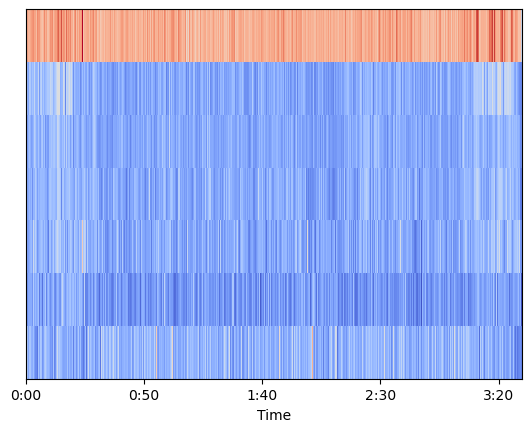

Spectral contrast =  [[ 8.58146855  8.44611733 12.22494004 ...  9.90762011 12.38243499
   6.88182929]
 [11.07378919  7.37509935  8.76871079 ... 10.65990914  8.80284917
  17.7065909 ]
 [ 7.39357086 12.00430508 10.31840342 ...  9.29193795 10.46173642
   6.30708432]
 ...
 [14.64471334 12.61769558 18.41178391 ... 12.9424854  13.79800155
  14.19106607]
 [18.26017227 18.71671605 22.14930961 ... 20.07184307 20.95015095
  17.30436951]
 [24.19797624 28.6593874  43.81379327 ... 43.6917194  18.97047132
  16.05999802]] (7, 4416)
Mean =  [13.50750416 22.19351093 25.41127736 25.73156458 26.023552   36.74971811
 52.82178379]
Std =  [ 5.23165223  5.82487029  6.36233498  6.20855389  6.83408067 10.79726907
  5.7706293 ]


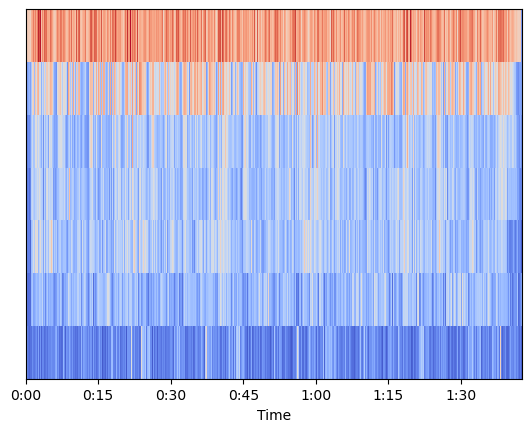

Spectral contrast =  [[ 0.25697716  0.25194504 14.480515   ... 12.94866984  0.95691599
   0.16038595]
 [ 0.88621624  0.87650006 14.480515   ... 15.61052774  8.64407579
   1.23830348]
 [ 5.99891808 13.70347024 43.04780981 ... 24.65321579 25.91638914
  25.48222495]
 ...
 [16.41913991 17.44884051 17.46170945 ... 26.7615755  29.70582084
  22.3443895 ]
 [12.59918648 17.49210279 16.59172957 ... 17.3980626  18.26092086
  20.24944914]
 [16.01633888 20.71808008 29.23581326 ... 21.71664092 21.80943163
  24.08932005]] (7, 5163)
Mean =  [25.4129535  18.47608955 21.52874996 24.8854115  25.9566661  27.80772164
 49.65730399]
Std =  [7.18547862 4.73501496 4.45900953 6.11186532 7.79356435 7.09682794
 9.7126575 ]


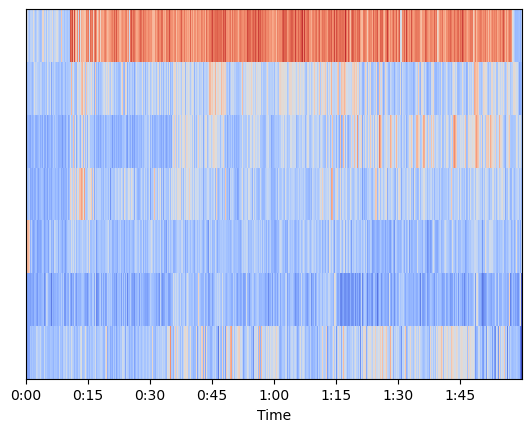

In [35]:
# spectral contrast
for i in range(3):
    stft = np.abs(librosa.stft(y[i]))
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sr[i])
    print('Spectral contrast = ', contrast, contrast.shape)
    print('Mean = ', contrast.mean(axis=1))
    print('Std = ', contrast.std(axis=1))
    librosa.display.specshow(contrast, sr=sr[i], x_axis='time', cmap='coolwarm')
    plt.show()

MFCC =  [[-5.3092981e+02 -5.3056799e+02 -5.2239716e+02 ... -5.3006403e+02
  -5.3092981e+02 -5.3092981e+02]
 [ 0.0000000e+00  5.1159883e-01  1.1779329e+01 ...  1.2050753e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  5.1133639e-01  1.0971077e+01 ...  1.1492929e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00  5.0467861e-01  4.3803906e+00 ...  5.0821781e-01
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  5.0304604e-01  4.0525551e+00 ...  5.0094396e-01
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  5.0124979e-01  3.6211598e+00 ...  5.2825677e-01
   0.0000000e+00  0.0000000e+00]] (12, 9029)
Mean =  [-71.97786    66.91255   -18.827974   26.471373    2.3133683   8.471485
   8.008296    7.8955216  -7.6947846   9.093119   -5.6398916   4.325164 ]
Std =  [91.93018  29.898998 23.078182 15.756527 12.040231 14.209719 11.564573
 10.347022 10.433623 10.211113 10.585509  8.219603]


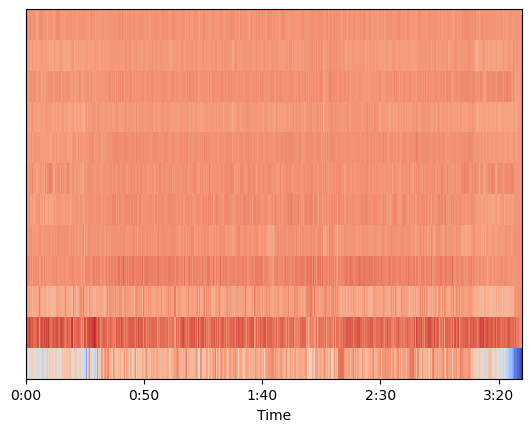

MFCC =  [[-505.755 -505.755 -505.755 ... -505.755 -505.755 -505.755]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 ...
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]] (12, 4416)
Mean =  [-206.05638    49.88292   -48.249958  -16.76684   -35.10921   -45.136402
  -12.409964  -24.419392  -26.62822    12.108293  -19.6498      5.515025]
Std =  [92.31463  27.305126 24.862791 23.923641 19.227142 17.111279 17.983845
 11.249151 14.589192 17.075968 12.482451 11.382716]


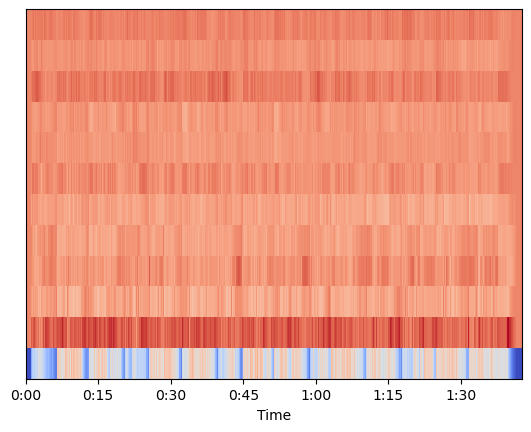

MFCC =  [[-602.36005 -602.36005 -602.36005 ... -602.36005 -602.36005 -602.36005]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 ...
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]] (12, 5163)
Mean =  [-272.362     126.63517   -32.75744    10.313722  -18.952078   -9.655402
  -15.617303  -10.163858  -17.376776   -9.524952  -10.311596   -3.99467 ]
Std =  [94.93507  32.70166  31.085873 23.108768 21.798767 17.952963 17.351006
 14.091187 13.882411 11.734054 12.595209 12.683915]


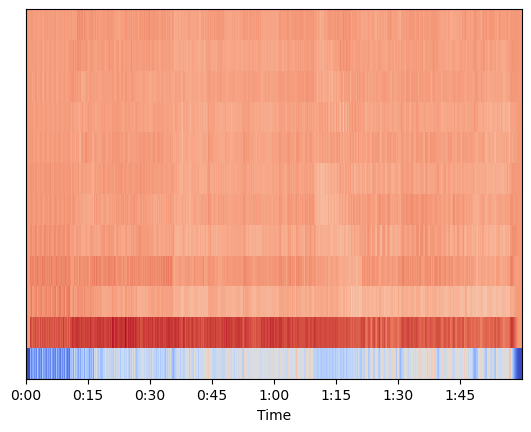

In [66]:
# MFCC
for i in range(3):
    mfcc = librosa.feature.mfcc(y=y[i], sr=sr[i], n_mfcc=12)
    print('MFCC = ', mfcc, mfcc.shape)
    print('Mean = ', mfcc.mean(axis=1))
    print('Std = ', mfcc.std(axis=1))
    librosa.display.specshow(mfcc, sr=sr[i], x_axis='time', cmap='coolwarm')
    plt.show()

In [22]:
# tempo
for i in range(3):
    tempo = librosa.feature.tempo(y=y[i], sr=sr[i])
    print('Tempo = ', tempo, tempo.shape)

Tempo =  [103.359375] (1,)
Tempo =  [123.046875] (1,)
Tempo =  [107.66601562] (1,)


Short-time energy =  [2.17801497e-11 1.48294002e-08 2.49420960e-07 ... 2.23311596e-11
 2.07552620e-11 2.61819212e-12] (9029,)
Mean =  0.02857655343453241
Std =  0.023473237449993085


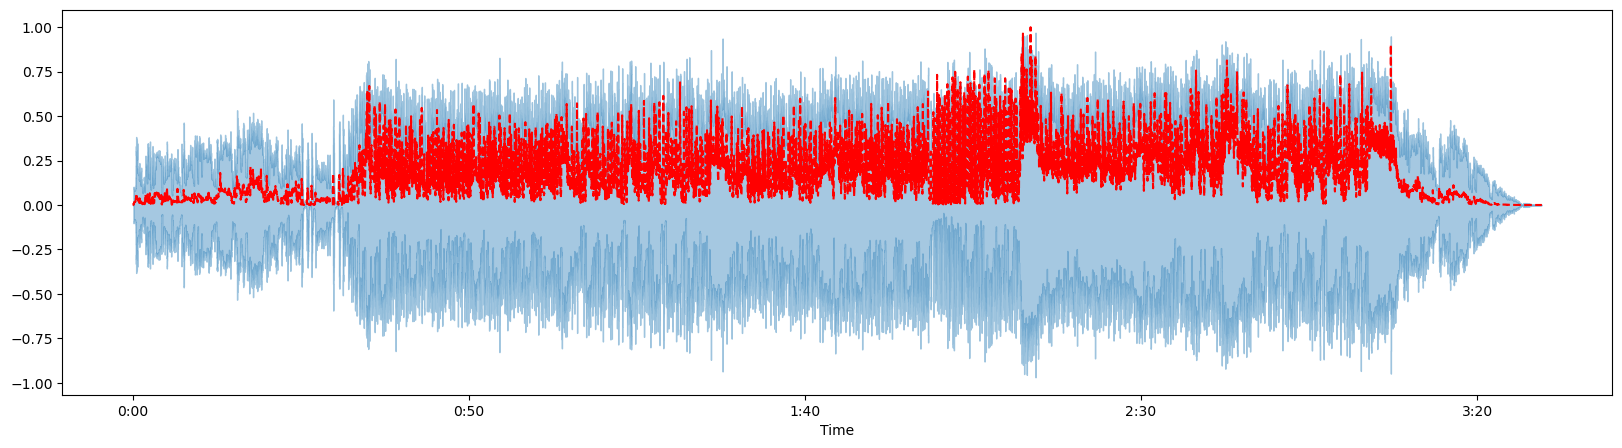

Short-time energy =  [1.85859965e-11 1.90184725e-11 2.05173807e-11 ... 2.16475624e-11
 2.05410665e-11 2.17494298e-11] (4415,)
Mean =  0.014937218510034947
Std =  0.01855577942269469


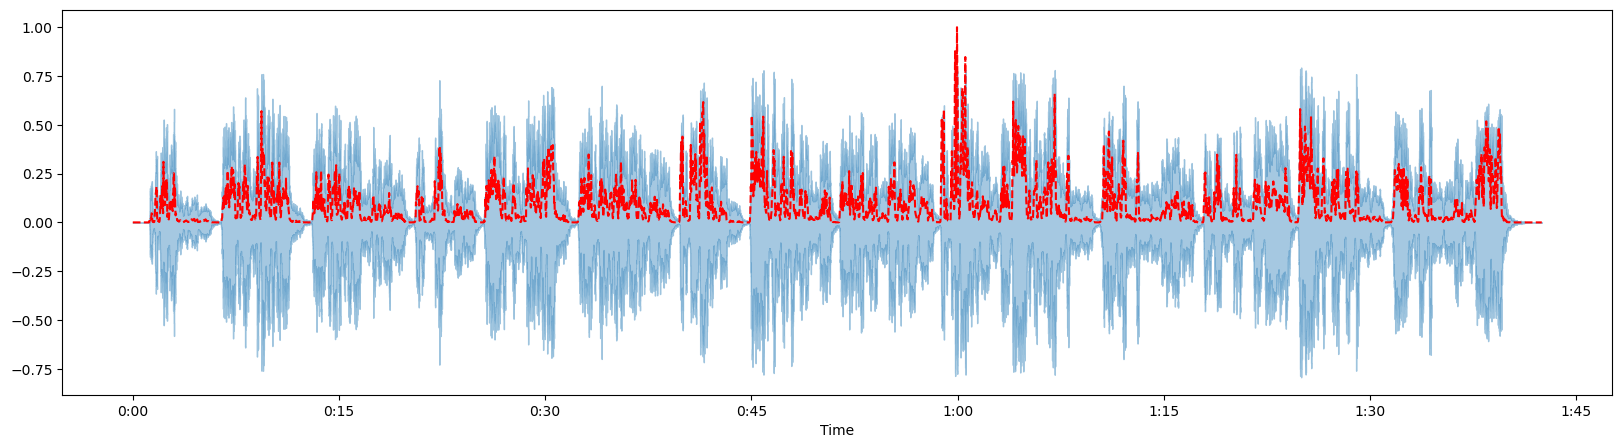

Short-time energy =  [2.84110240e-10 2.50017745e-10 2.83851466e-10 ... 9.90762350e-10
 7.22534021e-10 3.41883961e-10] (5163,)
Mean =  0.0041113199815640735
Std =  0.00482792027556047


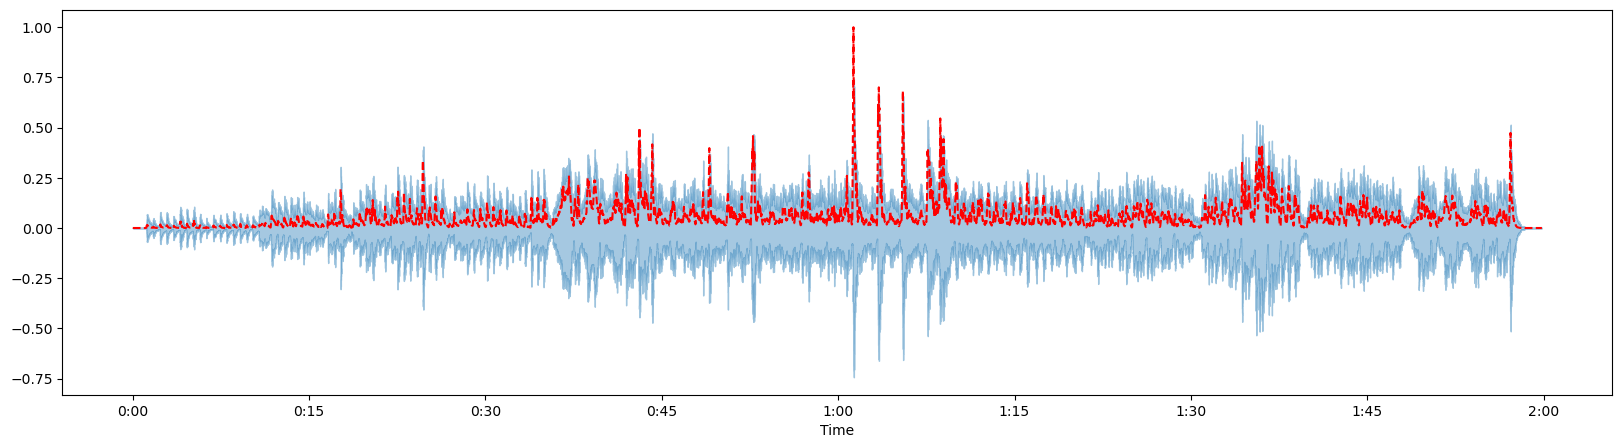

In [30]:
# short-time energy
hop_length = 512 # ramki się zazębiają, zobaczyć dla hop_length=frame_length (ramki się nie zazębiają)
frame_length = 512
for i in range(3):
    ste = np.array([
        sum(abs(y[i][j:j+frame_length] ** 2) / frame_length) # dodać podzielenie przez N??
        for j in range(0, len(y[i]), hop_length)
    ])
    print('Short-time energy = ', ste, ste.shape)
    print('Mean = ', ste.mean())
    print("Std = ", ste.std())
    
    frames = range(len(ste))
    t = librosa.frames_to_time(frames, sr=sr[i], hop_length=hop_length)
    
    plt.figure(figsize=(20, 5))
    librosa.display.waveshow(y[i], sr=sr[i], alpha=0.4)
    plt.plot(t, ste/ste.max(), 'r--')
    plt.show()

In [24]:
for i in range(3):
    rms = librosa.feature.rms(y=y[i])
    print('RMS = ', rms, rms.shape)
    print('Mean = ', rms.mean())
    print('Std = ', rms.std())

RMS =  [[6.0932707e-05 2.5703700e-04 3.9710762e-04 ... 1.7810780e-04
  9.4281138e-05 3.3802594e-06]] (1, 9029)
Mean =  0.15532123
Std =  0.066722326
RMS =  [[3.0661240e-06 3.8118844e-06 4.4734688e-06 ... 4.5538641e-06
  3.9980637e-06 3.2515570e-06]] (1, 4416)
Mean =  0.10206366
Std =  0.06720748
RMS =  [[1.1555604e-05 1.4300170e-05 1.6921302e-05 ... 2.8237313e-05
  2.6933843e-05 2.2667049e-05]] (1, 5163)
Mean =  0.056452382
Std =  0.030404743


../full_songs/choir/choir1.mp3
[ 2.8421709e-14  8.5265128e-14 -5.6843419e-14 ...  1.6937065e-09
  2.5575878e-07  3.7427981e-09]
22050


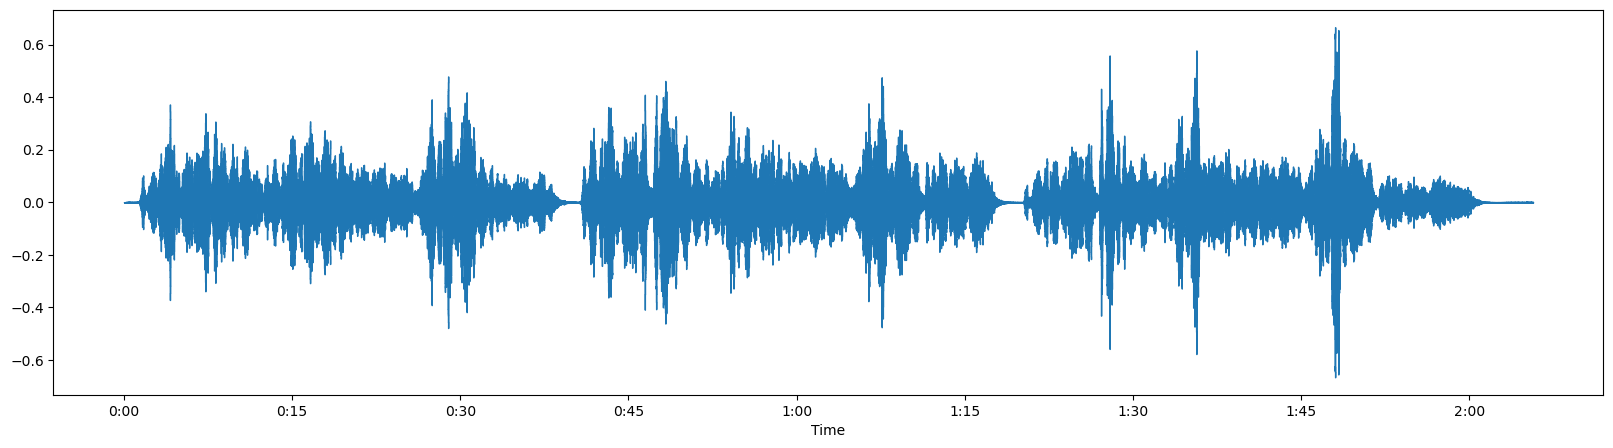

In [6]:
input_file = "../full_songs/choir/choir1.mp3"
print(input_file)
y, sr = librosa.load(input_file)
print(y)
print(sr)
plt.figure(figsize=(20, 5))
librosa.display.waveshow(y, sr=sr)
plt.show()

2771712 2635264


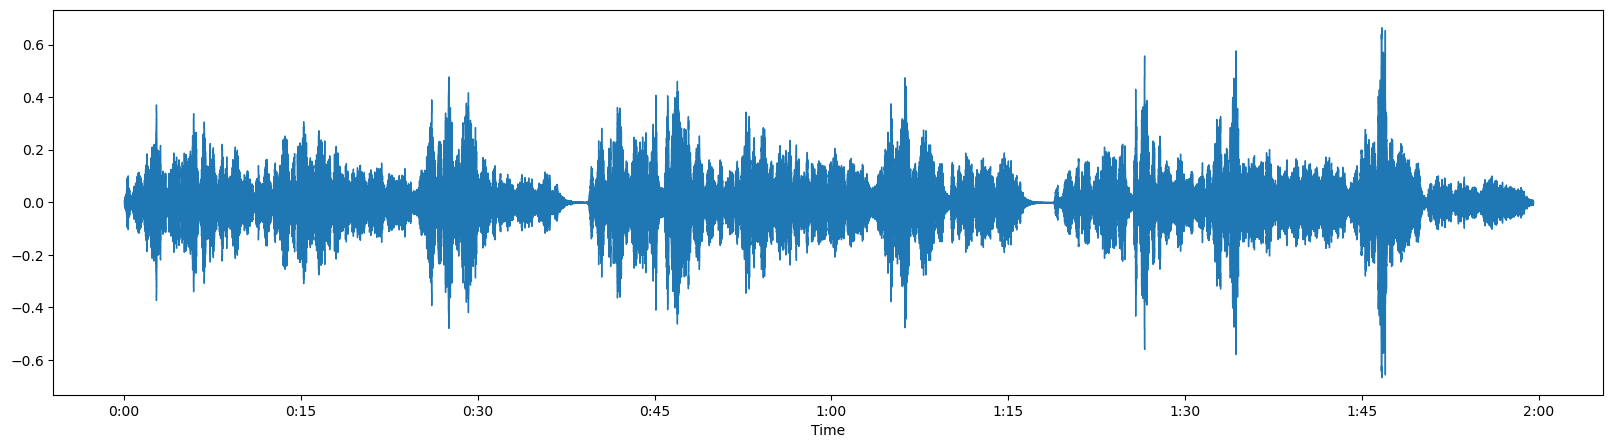

In [5]:
# trimming the silence at the beginning and end
y_trim, _ = librosa.effects.trim(y, top_db=40)
print(len(y), len(y_trim))
plt.figure(figsize=(20, 5))
librosa.display.waveshow(y_trim, sr=sr)
plt.show()

In [8]:
sample_length_seconds = 20
sample_length = int(sample_length_seconds * sr)
print(sample_length)
total_samples = y_trim.shape[0]

441000


In [14]:
start = 0
end = sample_length
n_samples = 5
i_sample = 1

while (end < total_samples) & (i_sample <= n_samples):
    sample = y_trim[start:end]

    print(start, end, i_sample, sample)

    start = end
    end += sample_length
    i_sample += 1

0 441000 1 [-1.6292196e-03 -6.5474818e-04  6.3825632e-05 ...  9.3437523e-02
  9.1380365e-02  8.5139684e-02]
441000 882000 2 [ 0.08081666  0.08017877  0.0839006  ... -0.06569453 -0.06130627
 -0.05279945]
882000 1323000 3 [-0.04085201 -0.0266567  -0.01811392 ... -0.0871048  -0.06520134
 -0.04293543]
1323000 1764000 4 [-0.03487395 -0.03497684 -0.02725058 ...  0.00655169  0.00487541
  0.0029504 ]
1764000 2205000 5 [0.00478048 0.00861339 0.01253609 ... 0.05619165 0.05209427 0.04498501]
